# LB 01: Первичный анализ и визуализация данных

<div style="text-align: right"> ПСА 5 (Введение в машинное обучение). Мехмат, БГУ</div>
    
<div style="text-align: right"> Тишуров Алексей, осень 2021 </div>

Данный материал использует лицензию [Creative Commons CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/) со всеми вытекающими. На прилагаемый к материалу датасет лицензия не распостраняется. 

Цель первой лабораторной работы в том, чтобы вы познакомились с некоторыми инструментами курса(если еще не были знакомы) и научились проводить первичный анализ данных с помощью pandas. Лаба в некоторой степени имитирует погружение в предметную область, которое является неотъемлемой частью работы DS. Если вы читаете эти строки, то вы уже прошли подготовку: настроили себе окружение, тем самым выполнив половину работы. Сама лаба является комплементарной к лекции. Вам предлагается пройти туториал по пакету pandas. В будущем по курсу нам также будет полезен numpy, оставляю ссылку и на него. Для выполнения текущей лабораторной хватит первого (от ODS) и/или туториалов из официальной документации.

- Первичный анализ данных от ODS https://habr.com/company/ods/blog/322626/
- Туториал по pandas от Kaggle https://www.kaggle.com/learn/pandas
- Туториал по python и numpy https://cs231n.github.io/python-numpy-tutorial/
- Собственные туториалы pandas. Например, [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) содержит очень много полезной информации.


# Введение

В рамках работы вы будете анализировать наборы данных в папке data: 'alfa.csv', 'bravo.csv', 'charlie.csv', состоящий из ежедневных (ВНИМАНИЕ! с пропусками) измерений трекером сна Oura Ring. В этом датасете вы найдете следующие столбцы. Их подробное описание дано на этой странице https://cloud.ouraring.com/docs/datatypes. Описания по соответствующим типам измерений (activity, readiness, sleep) находятся на своих подстраницах. Далеко не факт, что для анализа вам понадобятся все колонки. 

Замечания:

 - Все время указано в секундах;
 - sleep_score, activity_score, readiness_score - от 0 до 100;
 - bedtime_start и bedtime_end - ISO timestamp с указанием таймзоны.
 - Трекер сна имеет свою погрешность и не может соревноваться с полисомнографией, поэтому в данных есть шум и ошибки.

Список колонок в конце документа.


ВНИМАНИЕ! Вы вольны работать с любым из трех датасетов. Однако, при сдаче вас попросят вместе с преподавателем пересчитать ноутбук с другим.


## Correlation does not imply causation

ВНИМАНИЕ! В рамках этой работы вы будете искать зависимости данных с помощью графиков и корреляции. Важно помнить, что корреляция не означает причинно-следственную связь: https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation. Получение выводов на основе одной только похожести графиков и корреляции Пирсона - одна из самых больших систематических ошибок, которую можно встретить в мире данных. Она часто прорывается на первые полосы газет и ведет к "сенсационным" заголовкам. Мы еще вернемся к этой теме в лабе про регрессию, а пока просто помните, что ваши находки - это лишь повод более серьезно подтверждать или опровергать наличие взаимосвязи в данных.


P.S. Некоторые из заданий могут показаться вам заведомо шутливыми или абсурдными. Так оно и есть.

Сама лаба заключается в получении ответов на следующие группы вопросов по данным.

# Базовые вопросы (**максимальная оценка 8**)

1. Какое среднее время сна? + Построить график изменения времени для каждого календарного года наблюдения отдельно. 
2. Есть ли зависимость между днями недели, выходными/буднями и качеством(и временем) сна? + Построить barplot для демонстрации.
3. Найти top-5 пар колонок с самой высокой корреляцией . + Нарисовать их scatter_plot.
4. Существует утверждение, что время глубокого сна зависит от времени отхода ко сну: чем раньше, тем больше. Проверить, верно ли утверждение для **этого** датасета целиком и по месяцам.
5. А теперь проверить, есть ли такая зависимость между **долей** глубокого сна и временем отбоя. Сравнить результаты. 
6. Узнать, как связаны среднее время сна, доля глубокого сна и его эффективность с одной стороны и средняя активность (число шагов) за предыдущие 3 дня с другой.
7. Найдите дни, которые входят в топ 5% дней по физической активности. Верно ли, что средний пульс за сдедующую ночь в таких случаях значительно выше и сильно отичается от минимального (sleep_hr_lowest)?
8. Зависит ли эффективность сна от времени года? Достаточно ли данных по всем порам года для таких выводов?
9. Может ли фаза луны влиять на качество сна? Некоторые ученые это даже проверяют. Например, [вот так](https://naked-science.ru/article/biology/prodemonstrirovano-vliyanie-fazy-luny-na-prodolzhitelnost-sna). По крайней мере, в полнолуние в комнате действительно намного светлее, если нет blackout штор. Давайте проверим, влияет ли луна напрямую (или мистически!) на Альфу, Браво и Чарли. Загрузите дополнительно data/moon_phases.csv с фазами луны за 2019-2021 год и сравните основные показатели качества (скор, эффективность, время отбоя и т.д.) с данными из столбца phase, связав фазы и данные по сну с помощью дат наблюдений.
10. Мы еще не смотрели на разброс температуры тела. Найдите в этих датасетах признаки прививки от COVID-19. Это единственное задание из списка, где вам **обязательно** использовать все 3 датасета, а не один случайный.

# Получение и обработка дополнительной информации (**максимальная оценка 9**)


Зайдите на ftp: ftp://ftp.gfz-potsdam.de/pub/home/obs/kp-ap/ и найдите там файл с индексом солнечной активности и скачайте его. Проблемы со скачиванием не являются оправданием. Попросите файл у коллег, если вдруг не получилось самостоятельно. Нам нужен файл Kp_ap_since_1932.txt. Hint: для удобства чтения как csv удалите из него шапку с описанием. Нам нужен столбец Kp. Этот индекс описывается следующим образом:

The geomagnetic three-hourly Kp index was introduced by J. Bartels in 1949 and is derived from the standardized K index (Ks) of 13 magnetic observatories. It is designed to measure solar particle radiation by its magnetic effects and today it is considered a proxy for the energy input from the solar wind to Earth.

1. Прочитайте данные индекса и нарисуйте его за весь период наблюдений. Наблюдается ли в нем какая-то периодичность?
2. Вычислите Kp-индекс для каждой ночи сна в датасете следующим образом:
    - Средний индекс за все наблюдения, которые попадают в период между отбоем и подъемом
    - Максимальное из этих наблюдений
3. Проверьте, есть ли какая-то зависимость между индексом геомагнитной активности и качеством сна (фазы, эффективность, оценка). Подтвердите ваши выводы вычислениями и графиками.


# Собственное творчество (**максимальная оценка 10**). Достаточно выполнения только одного из заданий на выбор.


1. Найдите еще какой-то источник данных, с которым можно совместно анализировать данные, которые вы изучали в рамках лабы. Это могут быть цены акций в индексе S&P 500, погода в Минске (далеко не всегда это будет верно для локации носителя), сонный гороскоп (если такой существует), да что угодно, что или разумно, или забавно. Проведите анализ наших датасетов.
2. Предложите вариант сравнения датасетов alfa, bravo и charlie. Например, сводную таблицу, графикы и иную аналитику в удобном виде по результатам ответов на все прошлые вопросы, какие-то взаимосвязи между ними и т.д.
3. Поосмотрите все неиспользованные колонки в датасете. Предложите аналитику/гипотезы для каждой из них.

ВНИМАНИЕ! РЕАЛИЗАЦИИ "ТВОРЧЕСТВА" У РАЗНЫХ СТУДЕНТОВ ДОЛЖНЫ БЫТЬ РАЗНЫМИ. Но я готов поверить в **небольшое** количество случайных совпадений. 


# Советы/пожелания

1. Если вам нужна какая-то новая величина для аналитики, то просто создайте новый столбец с ней. Например, вычислите долю глубокого сна как df['deep_sleep_ratio'] = df['deep_sleep_time'] / df['total_sleep_time']. И пользуйтесь на здоровье.
2. Привести даты в удобный для работы формат можно с помощью pd.to_datetime. Дальше к стоблцу можно обращаться с помощью dt и получать нужные часы, минуты, дни недели и т.д. Например, вычисление минут после полуночи до времени сна: df['bedtime_start'].dt.hour * 60 + df['bedtime_start'].dt.minute. ВНИМАНИЕ! Последнее верно, только если каждое время отбоя позже полуночи.
3. Построение графиков удобно делать напрямую через DataFrame. Например, df.plot.scatter('sleep_score', 'activity_score'). Иногда может быть удобно вызвать график у конкретного столбца. Например, df['average_rhr'].hist(bins=20). Кому-то удобнее будет пользоватся matplotlib или любой другой библиотекой(если вдруг у вас есть опыт). Графики в matplotlib можно сделать визуально поприятнее при помощи seaborn.
4. Если вам нужно выполнять повторяющиеся действия несколько раз, то выделяйте их в функцию, а не занимайтесь копипастой.
5. Еще полезные методы:
   - groupby для вычисления статистик по группам https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
   - plot для рисования https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
   - df.describe, df.corr
   - df[column].rolling() - для вычисления скользящих статистик за период. Будет полезно в вопросе №6.


# Чтение данных

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
import random
from dateutil import parser

Вот тут каждому студенту загрузится случайный датасет. В дальнейшем считайте его базовым конкретно в вашем случае.

In [7]:
names = [f for f in glob.glob('data/*') if 'moon' not in f]
name = random.choice(names)
df = pd.read_csv(name)
print(name)

data/alfa.csv


In [61]:
df.head()

,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_light,...,activity_cal_active,activity_cal_total,activity_high,activity_inactive,activity_low,activity_medium,activity_score,activity_steps,readiness_score,readiness_score_activity_balance
0,4050,2019-09-20T09:02:55+03:00,2019-09-20T00:10:55+03:00,17.375,4410,31920,87,67.93,60,17850,...,226,2344,0,712,248,9,87.0,5227,89,100
1,6450,2019-09-21T11:58:57+03:00,2019-09-21T01:03:57+03:00,17.000,7590,39300,84,64.54,55,19650,...,143,2164,1,644,151,5,83.0,3123,90,97
2,5610,2019-09-22T10:36:38+03:00,2019-09-22T02:25:38+03:00,16.625,4680,29460,81,55.81,50,17400,...,637,3251,1,555,280,53,84.0,11001,79,95
3,4170,2019-09-23T08:54:10+03:00,2019-09-23T02:02:10+03:00,17.125,6360,24720,83,55.92,51,12870,...,587,3300,1,628,353,43,84.0,9430,74,73
4,2580,2019-09-24T08:59:15+03:00,2019-09-24T01:34:15+03:00,16.750,6630,26700,90,58.22,52,15000,...,547,3244,1,634,341,31,79.0,8662,76,74


In [ ]:
df['sleep_bedtime_start'] = pd.to_datetime(df['sleep_bedtime_start'])

df['sleep_bedtime_end'] = pd.to_datetime(df['sleep_bedtime_end'])

df['summary_date']= pd.to_datetime(df['summary_date'])

In [ ]:
df.describe

# Выполнение заданий

## Список колонок

Ниже список колонок с парой пояснений:

- activity_average_met
- activity_cal_active
- activity_cal_total
- activity_high
- activity_inactive
- activity_low
- activity_medium
- activity_score - комплексная оценка активности
- activity_steps
- readiness_score - комплексная оценка общей готовности организма к дню
- readiness_score_activity_balance
- sleep_awake
- sleep_bedtime_end
- sleep_bedtime_start
- sleep_breath_average
- sleep_deep
- sleep_duration
- sleep_efficiency
- sleep_hr_average
- sleep_hr_lowest
- sleep_light
- sleep_midpoint_time
- sleep_onset_latency
- sleep_rem
- sleep_restless
- sleep_rmssd
- sleep_score
- sleep_score_deep
- sleep_score_efficiency
- sleep_score_latency
- sleep_score_rem
- sleep_score_total
- sleep_temperature_delta
- sleep_temperature_deviation
- sleep_temperature_trend_deviation
- sleep_total
- summary_date - дата, для которой 

## 1

In [834]:
df['sleep_duration'].mean()

29293.16129032258

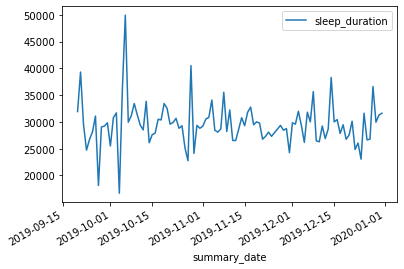

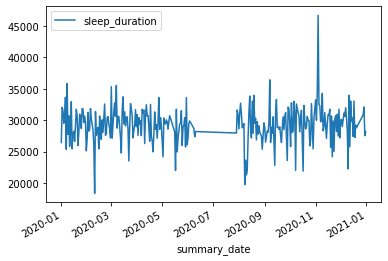

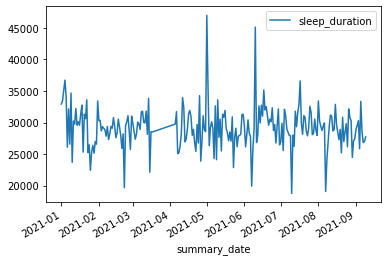

In [442]:
grouped = df.groupby(df['summary_date'].map(lambda x: x.year))[["summary_date","sleep_duration"]]  
for key in grouped.groups.keys():
    grouped.get_group(key).plot(x = "summary_date", y = "sleep_duration")
plt.show()

## 2

<AxesSubplot:xlabel='sleep_bedtime_start'>

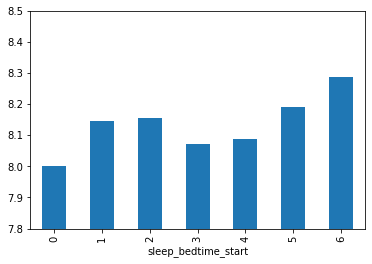

In [497]:
df.groupby(df['sleep_bedtime_start'].map(lambda x: x.weekday()))["sleep_duration"].apply(lambda grp: grp.mean()/3600).plot.bar(ylim = (7.8,8.5))

## 3

In [526]:
corr = df.corr().abs().unstack().sort_values(kind="quicksort").drop_duplicates()[-6:-1]

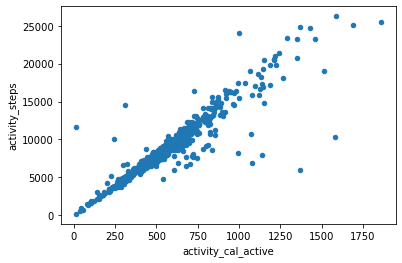

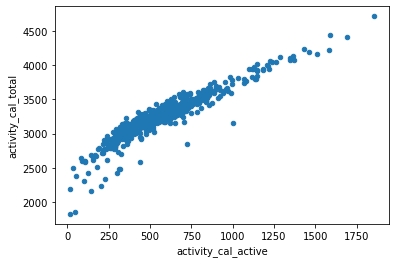

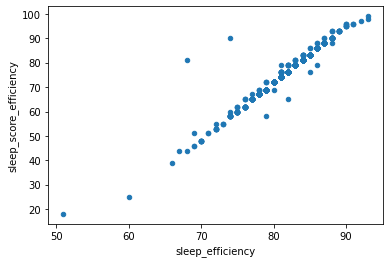

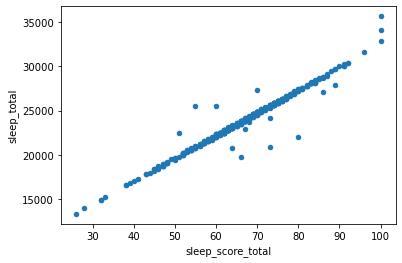

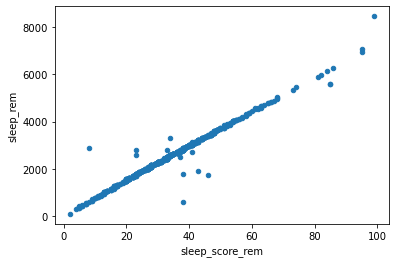

In [532]:
for i in corr.index:
    df.plot.scatter(x = i[0], y = i[1] )
plt.show()

## 4

<AxesSubplot:xlabel='sleep_bedtime_start'>

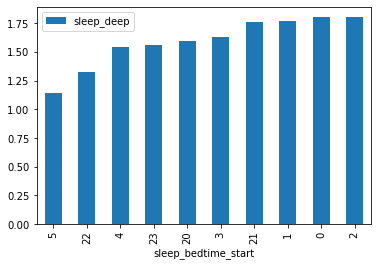

In [794]:
group = df.groupby(df['sleep_bedtime_start'].map(lambda x: x.hour))[['sleep_deep']].apply(lambda grp: grp.mean()/3600)
#group.nlargest(10)
group.sort_values('sleep_deep').plot.bar()

## 5

In [112]:
df["sleep_deep_ratio"]= df["sleep_deep"]/df["sleep_duration"]

<AxesSubplot:xlabel='sleep_bedtime_start'>

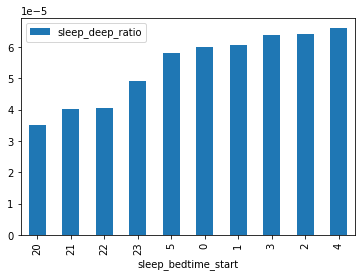

In [796]:
group = df.groupby(df['sleep_bedtime_start'].map(lambda x: x.hour))[['sleep_deep_ratio']].apply(lambda grp: grp.mean()/3600)
group.sort_values('sleep_deep_ratio').plot.bar()

## 6

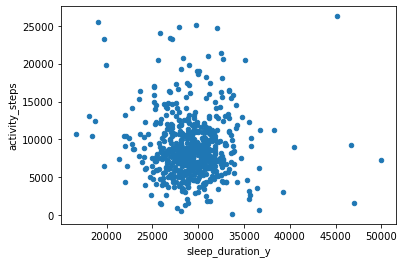

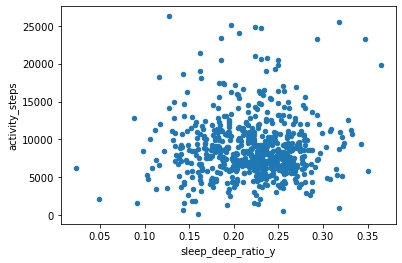

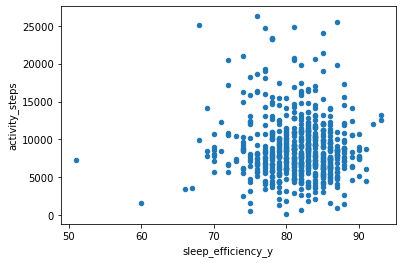

In [698]:
prev1 = pd.merge(pd.DataFrame(df.rolling(3, on = "summary_date").mean().rename(columns={"activity_steps":"steps_average"})),df,left_index=True, right_index=True)[["activity_steps","sleep_duration_y","sleep_deep_ratio_y","sleep_efficiency_y"]]
# prev_3.plot(x = ["activity_steps" for _ in prev_3.columns.values[:-1]],y=prev_3.columns.values[:-1], subplots= True, figsize = (8,12), kind = "scatter")
for i, col in enumerate(prev1.columns.values[1:]):
    prev1.plot(x=col, y="activity_steps", kind="scatter")
plt.show()

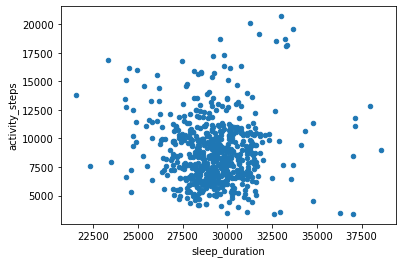

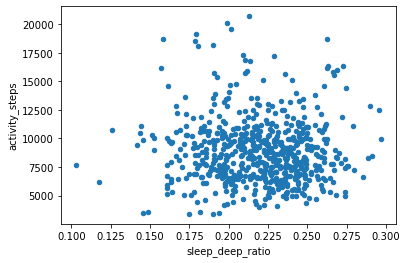

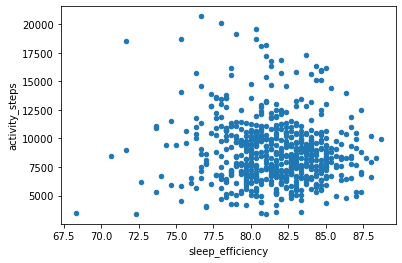

In [696]:
prev_3 = df.rolling(3, on = "summary_date").mean()[["activity_steps","sleep_duration","sleep_deep_ratio","sleep_efficiency"]]
# prev_3.plot(x = ["activity_steps" for _ in prev_3.columns.values[:-1]],y=prev_3.columns.values[:-1], subplots= True, figsize = (8,12), kind = "scatter")
for i, col in enumerate(prev_3.columns.values[1:]):
    prev_3.plot(x=col, y="activity_steps", kind="scatter")
plt.show()

## 7

In [651]:
(df['sleep_hr_average']-df['sleep_hr_lowest']).mean()

7.078790322580649

<AxesSubplot:xlabel='activity_score', ylabel='difference'>

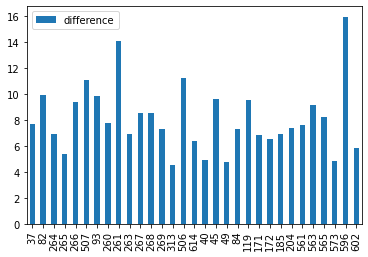

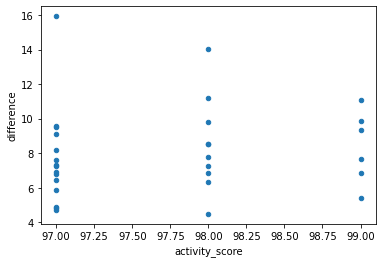

In [797]:
gr = df.nlargest(int(0.05*620),'activity_score')[['summary_date' ,'activity_score','sleep_hr_average','sleep_hr_lowest' ]]
gr["difference"] = (gr['sleep_hr_average']-gr['sleep_hr_lowest'])
gr.plot.bar(y = "difference")
gr.plot.scatter(x = "activity_score",y = "difference")

<AxesSubplot:xlabel='activity_steps', ylabel='difference'>

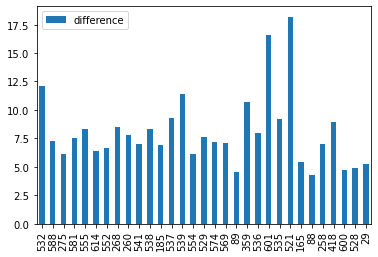

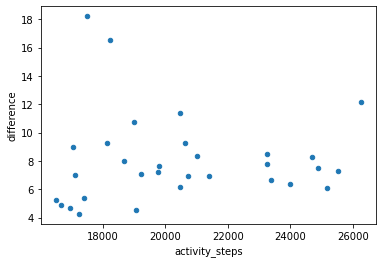

In [798]:
gr = df.nlargest(int(0.05*620),'activity_steps')[['summary_date' ,'activity_steps','sleep_hr_average','sleep_hr_lowest' ]]
gr["difference"] = (gr['sleep_hr_average']-gr['sleep_hr_lowest'])
gr.plot.scatter(x = "activity_steps",y = "difference")

In [ ]:
gr = df.nlargest(int(0.05*620),'activity_steps')[['summary_date' ,'activity_low','activity_medium','activity_high','sleep_hr_average','sleep_hr_lowest' ]]
gr["difference"] = (gr['sleep_hr_average']-gr['sleep_hr_lowest'])
gr["activity_sum"] = gr['activity_low']+ gr['activity_medium']+ gr['activity_high']
gr.plot.scatter(x = "activity_sum",y = "difference")

<AxesSubplot:xlabel='activity_high', ylabel='difference'>

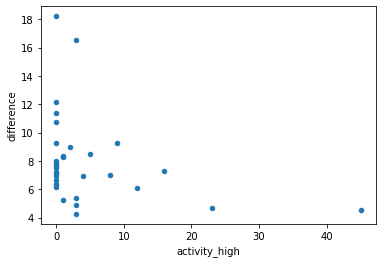

In [800]:
gr = df.nlargest(int(0.05*620),'activity_steps')[['summary_date' ,'activity_high','sleep_hr_average','sleep_hr_lowest' ]]
gr["difference"] = (gr['sleep_hr_average']-gr['sleep_hr_lowest'])
gr.plot.scatter(x = "activity_high",y = "difference")

## 8

In [146]:
[i%12 // 3 + 1 for i in range(1,13)]

[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]

sleep_bedtime_start
1    [81.71764705882353, 93, 70]
2    [81.82389937106919, 91, 60]
3            [81.296875, 93, 68]
4    [81.34969325153374, 91, 51]
Name: sleep_efficiency, dtype: object

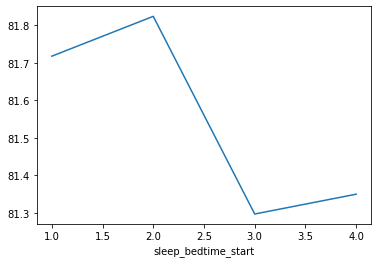

In [623]:
df.groupby(df['sleep_bedtime_start'].map(lambda x: x.month%12 // 3 + 1))['sleep_efficiency'].mean().plot()
df.groupby(df['sleep_bedtime_start'].map(lambda x: x.month%12 // 3 + 1))['sleep_efficiency'].apply(lambda grp: [grp.mean(), grp.max(), grp.min()])

## 9

In [186]:
moon = pd.read_csv('data/moon_phases.csv')

In [193]:
moon.head()

,date,position,phase
0,2019-01-01,0.821026,Waning Crescent
1,2019-01-02,0.854889,Waning Crescent
2,2019-01-03,0.888752,Waning Crescent
3,2019-01-04,0.922616,Waning Crescent
4,2019-01-05,0.956479,New Moon


In [194]:
moon['date']= pd.to_datetime(moon['date'])

array([<AxesSubplot:xlabel='phase'>, <AxesSubplot:xlabel='phase'>,
       <AxesSubplot:xlabel='phase'>, <AxesSubplot:xlabel='phase'>],
      dtype=object)

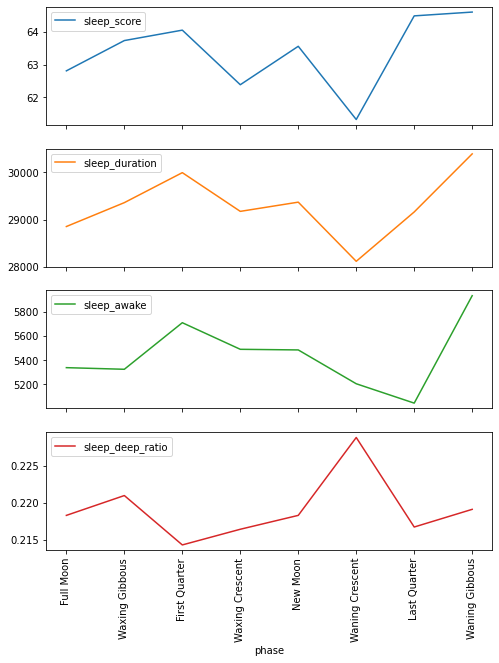

In [596]:
phase_order = {'Full Moon': 0, 'Waxing Gibbous': 1,'First Quarter':2,'Waxing Crescent':3, 'New Moon': 4, 'Waning Crescent':5,'Last Quarter':6,'Waning Gibbous':7} 
moon_sleep = pd.merge(df, moon, left_on='summary_date', right_on='date')
data = moon_sleep.groupby(moon_sleep['phase']).mean().sort_values(by=['phase'], key=lambda x: x.map(phase_order))[["sleep_score","sleep_duration", "sleep_awake","sleep_deep_ratio"]]
# for i in ["sleep_score","sleep_duration"]:
#     data.plot.bar(y = i)
# plt.show()
data.plot(subplots = True,rot=90, figsize = (8,10))

## 10

In [536]:
df1 = pd.read_csv("data/alfa.csv")
df2 = pd.read_csv("data/bravo.csv")
df3 = pd.read_csv("data/charlie.csv")

df1['sleep_bedtime_start'] = pd.to_datetime(df1['sleep_bedtime_start'])
df1['sleep_bedtime_end'] = pd.to_datetime(df1['sleep_bedtime_end'])
df1['summary_date']= pd.to_datetime(df1['summary_date'])

df2['sleep_bedtime_start'] = pd.to_datetime(df2['sleep_bedtime_start'])
df2['sleep_bedtime_end'] = pd.to_datetime(df2['sleep_bedtime_end'])
df2['summary_date']= pd.to_datetime(df2['summary_date'])

df3['sleep_bedtime_start'] = pd.to_datetime(df3['sleep_bedtime_start'])
df3['sleep_bedtime_end'] = pd.to_datetime(df3['sleep_bedtime_end'])
df3['summary_date']= pd.to_datetime(df3['summary_date'])

471    1.38
492    1.48
493    1.61
Name: sleep_temperature_delta, dtype: float64

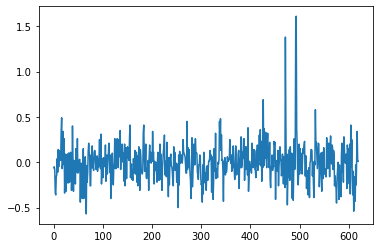

In [571]:
df1["sleep_temperature_delta"].plot()
df1.loc[df1["sleep_temperature_delta"] > 1]["sleep_temperature_delta"]

315    1.74
Name: sleep_temperature_delta, dtype: float64

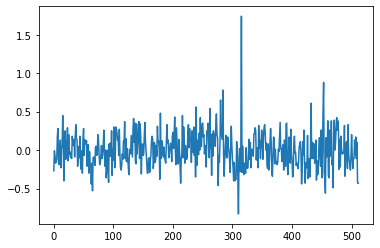

In [574]:
df2["sleep_temperature_delta"].plot()
df2.loc[df2["sleep_temperature_delta"] > 1]["sleep_temperature_delta"]

171    1.12
398    1.33
Name: sleep_temperature_delta, dtype: float64

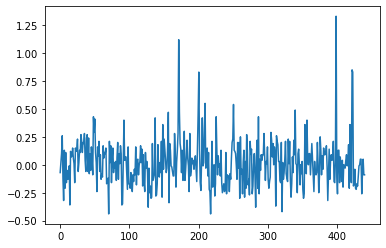

In [575]:
df3["sleep_temperature_delta"].plot()
df3.loc[df3["sleep_temperature_delta"] > 1]["sleep_temperature_delta"]

# Задания с геомагнетическими

## 1

In [280]:
geo = pd.read_csv('data/Kp_ap_since_1932.csv')

new = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'].str.split(" ", n = 1, expand = True)
geo["year"] = new[0]
geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'] = new[1]

new = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'].str.split(" ", n = 1, expand = True)
geo["month"] = new[0]
geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'] = new[1]

new = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'].str.split(" ", n = 1, expand = True)
geo["day"] = new[0]
geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'] = new[1]

new = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'].str.split(" ", n = 1, expand = True)
geo["time_start"] = new[0]
geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'] = new[1]

new = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'].str.split(" ", n = 1, expand = True)
geo["time_end"] = new[0]
geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'] = new[1]

new = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'].str.split(n = 1, expand = True)
geo["days"] = new[0]
geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'] = new[1]

new = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'].str.split(n = 1, expand = True)
geo["days_m"] = new[0]
geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'] = new[1]

new = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'].str.split( n = 1, expand = True)
geo["kp"] = new[0]
geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'] = new[1]

new = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'].str.split(n = 1, expand = True)
geo["ap"] = new[0]
geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D'] = new[1]

geo["D"] = geo['#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D']

geo = geo.drop(columns='#YYY MM DD hh.h hh._m        days      days_m     Kp   ap D')

geo.head()

,year,month,day,time_start,time_end,days,days_m,kp,ap,D
0,1932,01,01,00.0,01.50,0.00000,0.06250,3.333,18,1
1,1932,01,01,03.0,04.50,0.12500,0.18750,2.667,12,1
2,1932,01,01,06.0,07.50,0.25000,0.31250,2.333,9,1
3,1932,01,01,09.0,10.50,0.37500,0.43750,2.667,12,1
4,1932,01,01,12.0,13.50,0.50000,0.56250,3.333,18,1


In [294]:
geo["start"] = pd.to_datetime(geo["year"]+"-"+ geo["month"]+"-"+geo["day"]+" "+ geo["time_start"].apply(lambda x :x.replace(".", ":")+ "0"))
geo["end"] = pd.to_datetime(geo["year"]+"-"+ geo["month"]+"-"+geo["day"]+" "+ geo["time_end"].apply(lambda x :x.replace(".", ":")))
geo.head()

,year,month,day,time_start,time_end,days,days_m,kp,ap,D,start,end
0,1932,01,01,00.0,01.50,0.00000,0.06250,3.333,18,1,1932-01-01 00:00:00,1932-01-01 01:50:00
1,1932,01,01,03.0,04.50,0.12500,0.18750,2.667,12,1,1932-01-01 03:00:00,1932-01-01 04:50:00
2,1932,01,01,06.0,07.50,0.25000,0.31250,2.333,9,1,1932-01-01 06:00:00,1932-01-01 07:50:00
3,1932,01,01,09.0,10.50,0.37500,0.43750,2.667,12,1,1932-01-01 09:00:00,1932-01-01 10:50:00
4,1932,01,01,12.0,13.50,0.50000,0.56250,3.333,18,1,1932-01-01 12:00:00,1932-01-01 13:50:00


In [300]:
geo["days"] = geo["days"].apply(lambda x: float(x))
geo["days_m"] = geo["days_m"].apply(lambda x: float(x))
geo["kp"] = geo["kp"].apply(lambda x: float(x))
geo["ap"] = geo["ap"].apply(lambda x: float(x))
geo["D"] = geo["D"].apply(lambda x: float(x))

<AxesSubplot:xlabel='year'>

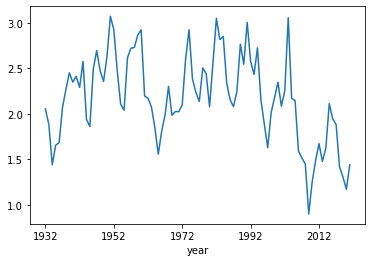

In [302]:
geo.groupby(geo['year'])['kp'].mean().plot()

In [767]:
geo['date']= pd.to_datetime(geo["year"]+"-"+ geo["month"]+"-"+geo["day"])
geo.head()

,year,month,day,time_start,time_end,days,days_m,kp,ap,D,start,end,date
0,1932,01,01,00.0,01.50,0.000,0.0625,3.333,18.0,1.0,1932-01-01 00:00:00,1932-01-01 01:50:00,1932-01-01
1,1932,01,01,03.0,04.50,0.125,0.1875,2.667,12.0,1.0,1932-01-01 03:00:00,1932-01-01 04:50:00,1932-01-01
2,1932,01,01,06.0,07.50,0.250,0.3125,2.333,9.0,1.0,1932-01-01 06:00:00,1932-01-01 07:50:00,1932-01-01
3,1932,01,01,09.0,10.50,0.375,0.4375,2.667,12.0,1.0,1932-01-01 09:00:00,1932-01-01 10:50:00,1932-01-01
4,1932,01,01,12.0,13.50,0.500,0.5625,3.333,18.0,1.0,1932-01-01 12:00:00,1932-01-01 13:50:00,1932-01-01


In [769]:
geo.start.values

array(['1932-01-01T00:00:00.000000000', '1932-01-01T03:00:00.000000000',
       '1932-01-01T06:00:00.000000000', ...,
       '2021-09-14T15:00:00.000000000', '2021-09-14T18:00:00.000000000',
       '2021-09-14T21:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# np.piecewise(np.zeros(len(geo)), [(geo.start.values >= start_date)&(geo.end <= end_date) for start_date, end_date in zip(df.sleep_bedtime_start.values, df.sleep_bedtime_end.values)], df.ID.values)

In [773]:
import pandasql as ps

sqlcode = '''
select *
from geo
inner join df on df.summary_date=geo.date
where geo.start >= df.sleep_bedtime_start and geo.end <= df.sleep_bedtime_end
'''

newdf = ps.sqldf(sqlcode,locals())

In [775]:
newdf.head()

,year,month,day,time_start,time_end,days,days_m,kp,ap,D,...,activity_cal_total,activity_high,activity_inactive,activity_low,activity_medium,activity_score,activity_steps,readiness_score,readiness_score_activity_balance,sleep_deep_ratio
0,2019,09,20,03.0,04.50,32039.125,32039.1875,0.333,2.0,1.0,...,2344,0,712,248,9,87.0,5227,89,100,0.138158
1,2019,09,20,06.0,07.50,32039.250,32039.3125,0.333,2.0,1.0,...,2344,0,712,248,9,87.0,5227,89,100,0.138158
2,2019,09,21,03.0,04.50,32040.125,32040.1875,2.000,7.0,1.0,...,2164,1,644,151,5,83.0,3123,90,97,0.193130
3,2019,09,21,06.0,07.50,32040.250,32040.3125,2.333,9.0,1.0,...,2164,1,644,151,5,83.0,3123,90,97,0.193130
4,2019,09,21,09.0,10.50,32040.375,32040.4375,2.000,7.0,1.0,...,2164,1,644,151,5,83.0,3123,90,97,0.193130


<AxesSubplot:xlabel='date'>

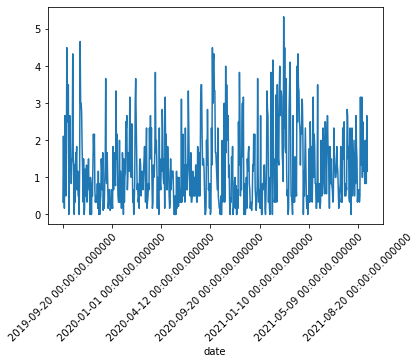

In [802]:
newdf.groupby(newdf["date"])["kp"].mean().plot(rot = )

<AxesSubplot:xlabel='date'>

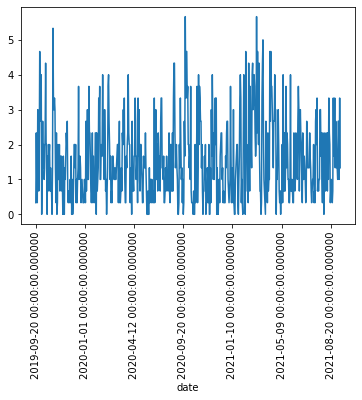

In [781]:
newdf.groupby(newdf["date"])["kp"].max().plot(rot = 90)

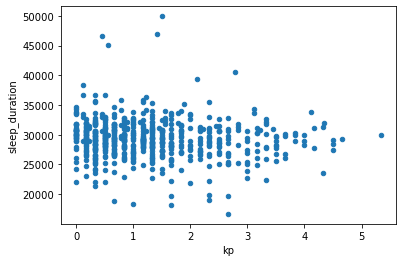

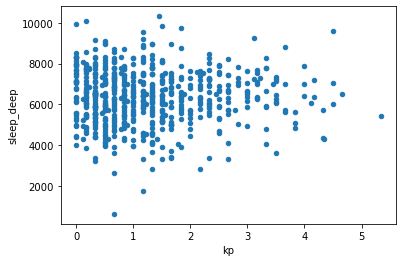

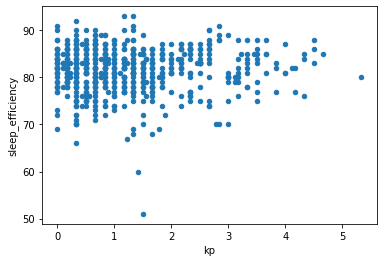

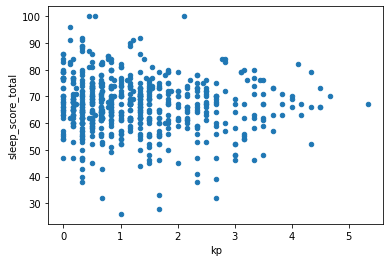

In [783]:
kpgroups = newdf.groupby(newdf["date"]).mean()[["kp","sleep_duration", "sleep_deep", "sleep_efficiency","sleep_score_total"]]
for i, col in enumerate(kpgroups.columns.values[1:]):
    kpgroups.plot(x="kp",y = col, kind="scatter")
plt.show()

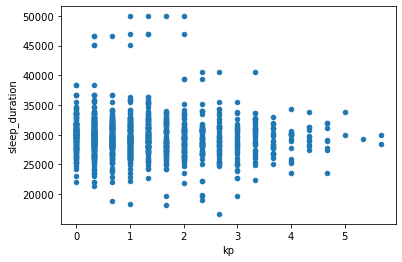

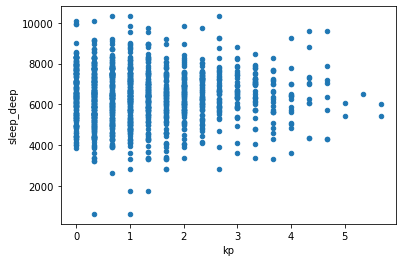

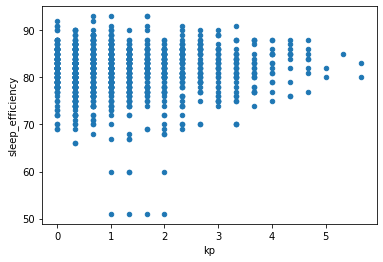

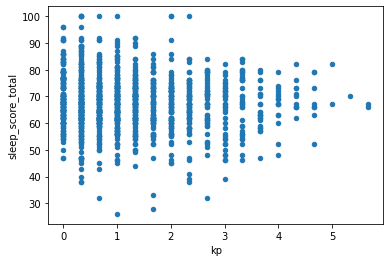

In [784]:
kpgroups1 = newdf[["kp","sleep_duration", "sleep_deep", "sleep_efficiency","sleep_score_total"]]
for i, col in enumerate(kpgroups1.columns.values[1:]):
    kpgroups1.plot(x="kp",y = col, kind="scatter")
plt.show()

# Дополнительные задания

In [333]:
mars2 = pd.read_csv('data/mars2.csv')
mars2.head()

,Year,Month,Day,Moon_age,right_ascens_hour,right_ascens_min,right_ascens_sec,deg,declination_min,declination_sec,Rise,Culm,Set,Mag.,Observable,Constellation
0,2019,9,27,28 days,11,43,38,2,51,29,06:00,12:19,18:39,1.8,Not observable,Virgo
1,2019,9,28,29 days,11,45,59,2,35,59,06:02,12:20,18:38,1.8,Not observable,Virgo
2,2019,9,29,01 days,11,48,20,2,20,27,06:00,12:17,18:34,1.8,Not observable,Virgo
3,2019,9,30,02 days,11,50,41,2,4,54,05:58,12:14,18:29,1.8,Not observable,Virgo
4,2019,10,1,03 days,11,53,3,1,49,21,06:00,12:14,18:28,1.8,Not observable,Virgo


In [392]:
mars2["Date"]= pd.to_datetime(mars2["Year"].apply(lambda x: str(x)) + "-" + mars2["Month"].apply(lambda x: str(x)) + "-" + mars2["Day"].apply(lambda x: str(x)))
mars2.head()

,Year,Month,Day,Moon_age,right_ascens_hour,right_ascens_min,right_ascens_sec,deg,declination_min,declination_sec,Rise,Culm,Set,Mag.,Observable,Constellation,Date
0,2019,9,27,28 days,11,43,38,2,51,29,06:00,12:19,18:39,1.8,Not observable,Virgo,2019-09-27
1,2019,9,28,29 days,11,45,59,2,35,59,06:02,12:20,18:38,1.8,Not observable,Virgo,2019-09-28
2,2019,9,29,01 days,11,48,20,2,20,27,06:00,12:17,18:34,1.8,Not observable,Virgo,2019-09-29
3,2019,9,30,02 days,11,50,41,2,4,54,05:58,12:14,18:29,1.8,Not observable,Virgo,2019-09-30
4,2019,10,1,03 days,11,53,3,1,49,21,06:00,12:14,18:28,1.8,Not observable,Virgo,2019-10-01


In [391]:
mars2.iloc[[0, -1]]

,Year,Month,Day,Moon_age,right_ascens_hour,right_ascens_min,right_ascens_sec,deg,declination_min,declination_sec,Rise,Culm,Set,Mag.,Observable,Constellation,Date
0,2019,9,27,28 days,11,43,38,2,51,29,06:00,12:19,18:39,1.8,Not observable,Virgo,2019-09-27
249,2020,6,2,11 days,23,1,20,-8,51,51,02:00,07:15,12:29,-0.0,03:18 until 03:41,Aquarius,2020-06-02


<AxesSubplot:xlabel='Constellation'>

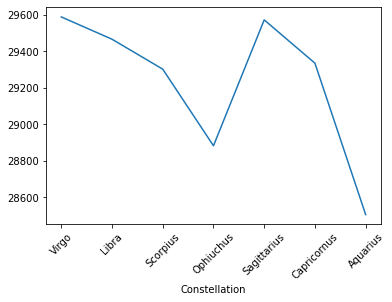

In [806]:
con_order = {"Virgo":0,"Libra":1,"Scorpius":2,"Ophiuchus":3,"Sagittarius":4,"Capricornus":5,"Aquarius":6}
mars_sleep= pd.merge(df, mars2, left_on='summary_date', right_on='Date')
mars_sleep.groupby(mars_sleep['Constellation']).mean().sort_values(by=['Constellation'], key=lambda x: x.map(con_order))["sleep_duration"].plot(rot=45)

<AxesSubplot:xlabel='Constellation'>

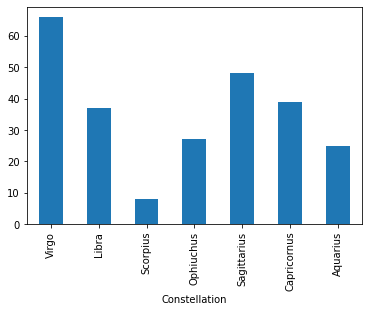

In [832]:
mars2.groupby(mars2["Constellation"], sort = False).size().plot.bar()

<AxesSubplot:xlabel='right_ascens_hour', ylabel='sleep_deep'>

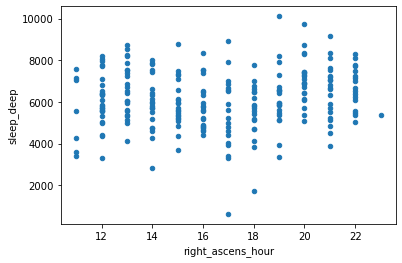

In [606]:
mars_sleep.plot.scatter(x = "right_ascens_hour",y = "sleep_deep")

<AxesSubplot:xlabel='deg', ylabel='sleep_score'>

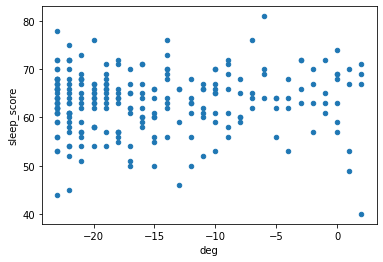

In [610]:
mars_sleep.plot.scatter(x = "deg",y = "sleep_score")

<AxesSubplot:xlabel='Date', ylabel='deg'>

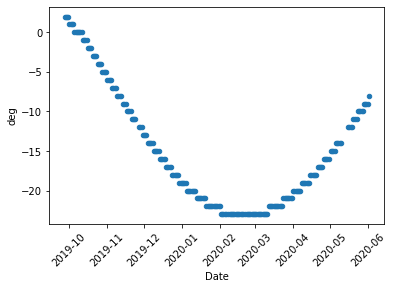

In [699]:
mars_sleep.plot.scatter(x = "Date",y = "deg",rot = 45)

<AxesSubplot:xlabel='activity_steps', ylabel='sleep_temperature_delta'>

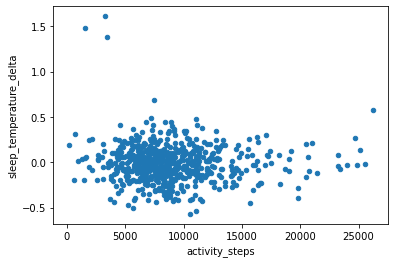

In [703]:
df.plot(x = "activity_steps", y = "sleep_temperature_delta", kind = "scatter")

<AxesSubplot:xlabel='steps_average', ylabel='sleep_temperature_delta_y'>

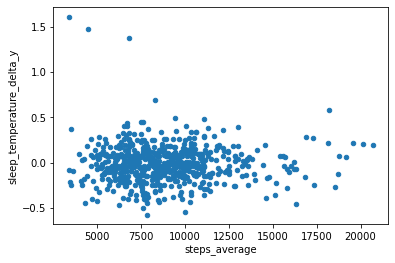

In [707]:
pd.merge(pd.DataFrame(df.rolling(3, on = "summary_date").mean().rename(columns={"activity_steps":"steps_average"})),df,left_index=True, right_index=True).plot.scatter(x = "steps_average", y = "sleep_temperature_delta_y")

In [714]:
holidays = pd.read_csv('data/holidays.csv')
holidays["date"] = pd.to_datetime(holidays["date"])
holidays.head()

,date,holiday
0,2012-01-02,New Year's Day
1,2012-02-20,Family Day
2,2012-04-06,Good Friday
3,2012-05-21,Victoria Day
4,2012-07-02,Canada Day


In [712]:
df.sleep_duration.mean()/3600

8.136989247311828

In [720]:
pd.merge(df,holidays, left_on = "summary_date", right_on = "date").sleep_duration.mean()/3600

8.133333333333333

<AxesSubplot:>

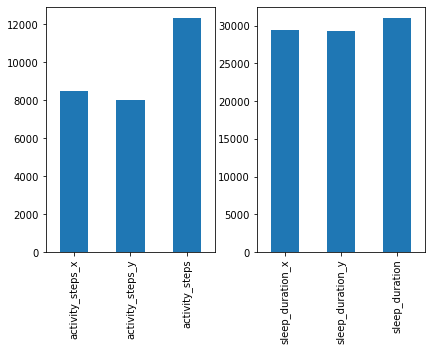

In [735]:
abc = pd.merge(pd.merge(df1,df2,left_index = True, right_index = True),df3,left_index = True, right_index = True)
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
abc[["activity_steps_x", "activity_steps_y", "activity_steps"]].mean().plot.bar(ax=axes[0])
abc[["sleep_duration_x", "sleep_duration_y", "sleep_duration"]].mean().plot.bar(ax=axes[1])